<a href="https://colab.research.google.com/github/manisankar29/CODSOFT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK-2**

# **CREDIT CARD FRAUD DETECTION**

## **Importing required libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import os
import warnings

print(os.listdir())
warnings.filterwarnings('ignore')

['.config', 'drive', '.ipynb_checkpoints', 'sample_data']


## **Importing and understanding the training dataset**

In [34]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/fraudTrain.csv")

### Printing out few columns

In [35]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


### Columns of training dataset

In [36]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Info of dataset

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Description of dataset

In [38]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Checking for missing values

In [39]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Shape of dataset

In [40]:
data.shape

(1296675, 23)

## **EDA for training dataset**

### Exploring categorical variables

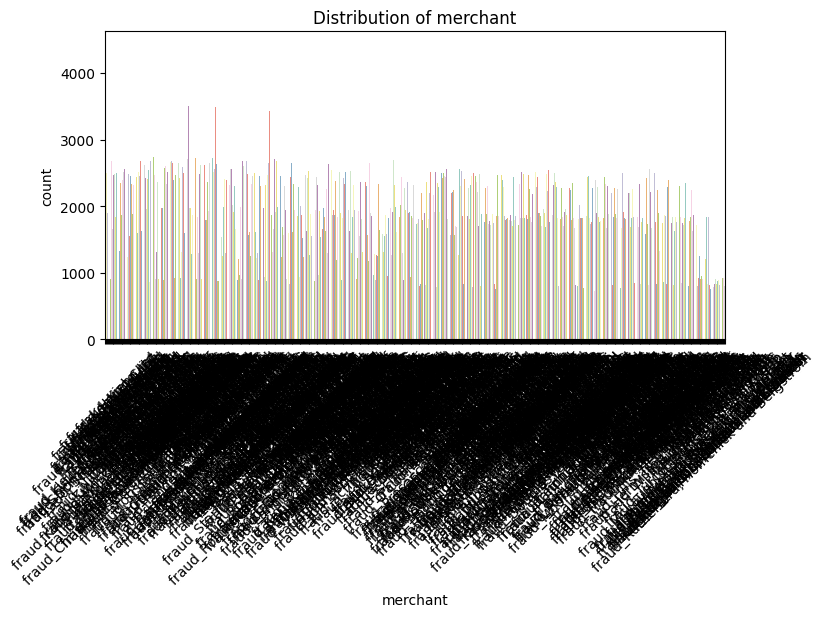

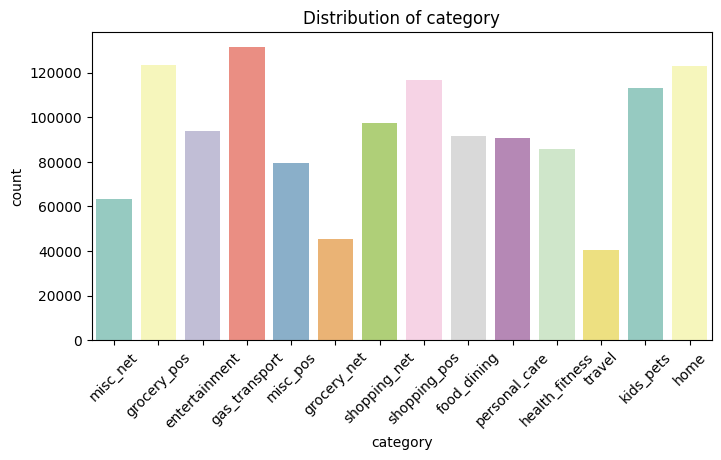

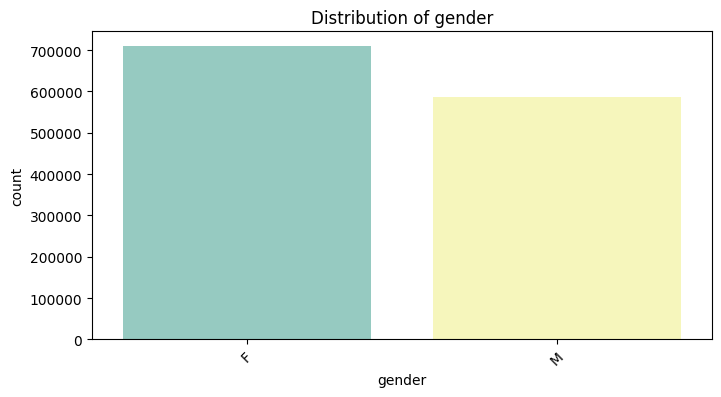

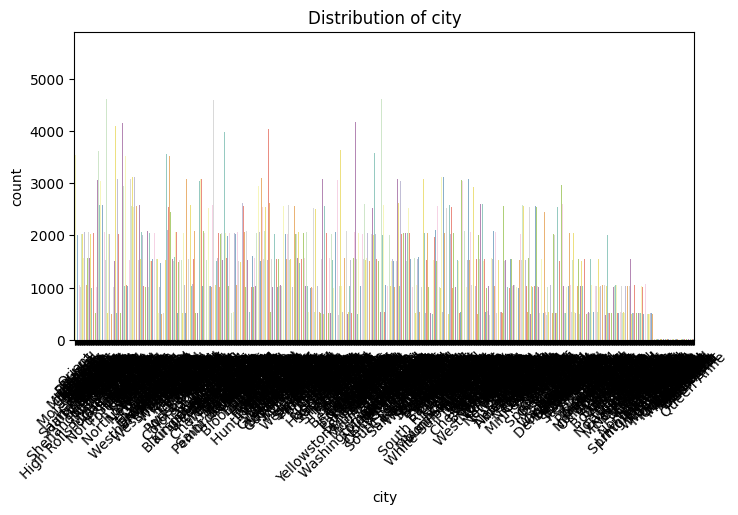

In [43]:
categorical_columns = ['merchant', 'category', 'gender', 'city']
for column in categorical_columns:
  plt.figure(figsize=(8, 4))
  sns.countplot(data=data, x=column, palette='Set3')
  plt.title(f'Distribution of {column}')
  plt.xticks(rotation=45)
  plt.show()

### Converting 'trans_date_trans_time' and 'dob' to datetime

In [44]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

### Visualizing Time-based analysis

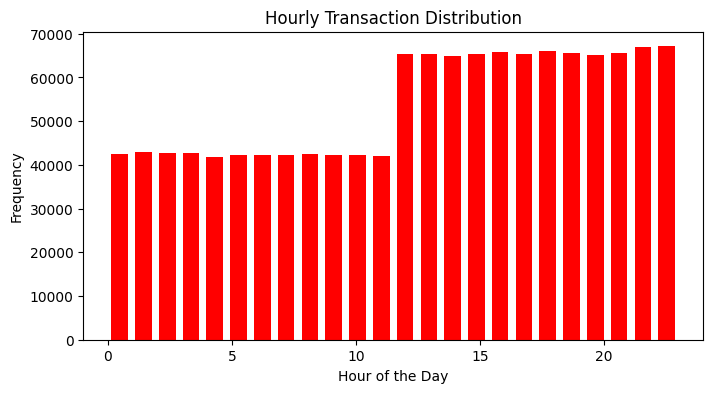

In [47]:
plt.figure(figsize=(8,4))
data['trans_date_trans_time'].dt.hour.plot(kind='hist', bins=24, rwidth=0.7, color='red')
plt.title('Hourly Transaction Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

### Visualizing the class distribution

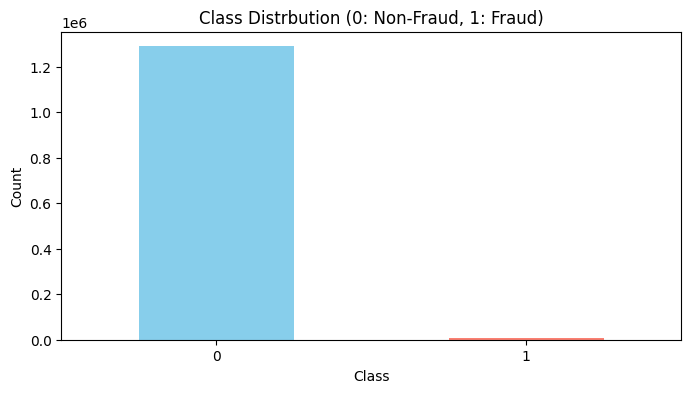

In [48]:
plt.figure(figsize=(8, 4))
data['is_fraud'].value_counts().plot(kind='bar',color=['skyblue', 'salmon'])
plt.title('Class Distrbution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [56]:
y = data["is_fraud"]
target_temp = data.is_fraud.value_counts()
print("Number of Fraud Cases: "+str(target_temp[1]))
print("Number of Non Fraud Cases: "+str(target_temp[0]))
print("Percentage of Customers without Fraud Cases: "+str(round(target_temp[0]*100/1296675,2)))
print("Percentage of customers with Fraud Cases: "+str(round(target_temp[1]*100/1296675,2)))

Number of Fraud Cases: 7506
Number of Non Fraud Cases: 1289169
Percentage of Customers without Fraud Cases: 99.42
Percentage of customers with Fraud Cases: 0.58


### Transaction Amount Decimal Part

In [49]:
data['amt_decimal'] = data['amt'] % 1

### Ensuring that 'trans_date_trans_time' is treated as astring

In [50]:
data['trans_date_trans_time'] = data['trans_date_trans_time'].astype(str)

### Age of Cardholder at the Time of Transaction

In [51]:
data['transaction_date'] = pd.to_datetime(data['trans_date_trans_time'].str.split(' ').str[0])
data['cardholder_age'] = (data['transaction_date'] - pd.to_datetime(data['dob'])).dt.days // 365

### Transaction amount to City Population Ratio

In [52]:
data['amt_to_city_pop_ratio'] = data['amt'] / data['city_pop']

### Displaying the updated data with new features

In [53]:
print(data[['amt_decimal','cardholder_age','amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.97              30               0.001422
1         0.23              40               0.719664
2         0.11              56               0.052987
3         0.00              52               0.023208
4         0.96              32               0.423838


### Dropping the specified columns and displaying the updated dataset

In [54]:
Drop_columns = [
    'Unnamed: 0',
    'cc_num',
    'trans_date_trans_time',
    'transaction_date',
    'first',
    'last',
    'street',
    'city',
    'state',
    'zip',
    'dob',
    'trans_num',
]
data = data.drop(columns = Drop_columns)

In [55]:
data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,amt_decimal,cardholder_age,amt_to_city_pop_ratio
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,0.97,30,0.001422
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,0.23,40,0.719664
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,0.11,56,0.052987
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0.00,52,0.023208
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,0.96,32,0.423838


## **Importing and understanding the testing dataset**

In [74]:
testing_data = pd.read_csv("/content/drive/MyDrive/Datasets/fraudTest.csv")

### Handling missing values

In [75]:
testing_data = testing_data.dropna()

### Printing out few columns

In [76]:
testing_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


### Info of testing data

In [77]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## **EDA for testing data**

In [79]:
testing_data['amt_decimal'] = testing_data['amt'] % 1

testing_data['trans_date_trans_time'] = testing_data['trans_date_trans_time'].astype(str)

testing_data['transaction_date'] = pd.to_datetime(testing_data['trans_date_trans_time'].str.split(' ').str[0])

testing_data['cardholder_age'] = (testing_data['transaction_date'] - pd.to_datetime(testing_data['dob'])).dt.days // 365

testing_data['amt_to_city_pop_ratio'] = testing_data['amt'] / testing_data['city_pop']

In [80]:
print(testing_data[['amt_decimal','cardholder_age','amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.86              52               0.000009
1         0.84              30               0.098808
2         0.28              49               0.001197
3         0.05              32               0.001096
4         0.19              65               0.002833


### Dropping specified columns

In [81]:
testing_data = testing_data.drop(columns = Drop_columns)

In [82]:
testing_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,amt_decimal,cardholder_age,amt_to_city_pop_ratio
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,0.86,52,0.000009
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,0.84,30,0.098808
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,0.28,49,0.001197
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,0.05,32,0.001096
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,0.19,65,0.002833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0,0.77,54,0.084335
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0,0.84,21,0.003892
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0,0.88,39,0.023583
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0,0.99,55,0.061938


## **Encoding categorical variables**

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [83]:
categorical_columns = ['gender','merchant','category','job']

for col in categorical_columns:
  data[col] = le.fit_transform(data[col])
  testing_data[col] = le.fit_transform(testing_data[col])

## **Train Test Split**

In [84]:
X_train = data.drop(columns=['is_fraud'])
Y_train = data['is_fraud']

X_test = testing_data.drop(columns=['is_fraud'])
Y_test = testing_data['is_fraud']

In [85]:
X_train.shape

(1296675, 14)

In [86]:
X_test.shape

(555719, 14)

In [87]:
Y_train.shape

(1296675,)

In [88]:
Y_test.shape

(555719,)

## **Model Fitting**

In [89]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is :"+str(score_lr))

The accuracy score achieved using Logistic Regression is :99.61


### Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt, Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt))

The accuracy score achieved using Decision Tree is: 99.41


### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf, Y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf))

The accuracy score achieved using Random Forest is: 99.76


### **Output final scores**

In [99]:
scores = [score_lr, score_dt, score_rf]
algorithms = ['Logistic Regression','Decision Tree','Random Forest']
for i in range(len(algorithms)):
  print("The accuracy score ahieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score ahieved using Logistic Regression is: 99.61%
The accuracy score ahieved using Decision Tree is: 99.41%
The accuracy score ahieved using Random Forest is: 99.76%


Therefore, Random Forest has good result when compared to other algorithms.

## **Prediction on New Data**

In [112]:
new_data = pd.DataFrame({
    'merchant': 'fraud_Johnston-Casper',
    'category': 'travel',
    'amt': 3.19,
    'gender': 'M',
    'lat': 44.2529,
    'long': -85.0170,
    'city_pop': 1126,
    'job': 'Furniture designer',
    'unix_time': 1371816917,
    'merch_lat': 44.959148,
    'merch_long': -85.884734,
    'amt_decimal': 0.19,
    'cardholder_age': 65,
    'amt_to_city_pop_ratio': 0.002833,
},index=[0])

In [113]:
new_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,amt_decimal,cardholder_age,amt_to_city_pop_ratio
0,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.017,1126,Furniture designer,1371816917,44.959148,-85.884734,0.19,65,0.002833


In [114]:
for col in categorical_columns:
  new_data[col] = le.fit_transform(new_data[col])

In [116]:
p = rf.predict(new_data)
if p[0]==0:
  print("Transaction Legitimate")
else:
  print("Transaction Fraudulent")

Transaction Legitimate
